In [81]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
from sklearn.neural_network import MLPClassifier

In [83]:
# Đọc tệp CSV vào DataFrame
df_train_test = pd.read_csv('cleaned_data.csv')
df_validation = pd.read_csv('test_data.csv')

# Trộn ngẫu nhiên các hàng của DataFrame
df_shuffled = df_train_test.sample(frac=1, random_state=42).reset_index(drop=True)

validation_data = df_validation
train_test_data = df_shuffled

In [84]:
from collections import defaultdict

In [85]:
def find_model(data, models):  
    kf = KFold(n_splits=5, shuffle=False)
    y = data['label']
    X = data.drop(['label', 'file'], axis=1)

    # Khởi tạo một từ điển để lưu trữ tỉ lệ nhận dạng đúng cho từng nhãn
    label_accuracies = defaultdict(list)

    # Loop through models
    for model in models:
        
        acc_scores = []

        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Khởi tạo model
            clf = model()

            # Train model
            clf.fit(X_train, y_train)

            # Dự đoán trên tập test
            y_pred = clf.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            acc_scores.append(acc)
            print(confusion_matrix(y_test, y_pred))
            cm = confusion_matrix(y_test, y_pred)
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
                        xticklabels=clf.classes_, 
                        yticklabels=clf.classes_)
            plt.xlabel('Predicted labels')
            plt.ylabel('True labels')
            plt.title('Confusion Matrix')
            plt.show()

            # Tính accuracy cho từng nhãn và lưu vào từ điển
            for label in y.unique():
                mask = y_test == label
                label_acc = accuracy_score(y_test[mask], y_pred[mask])
                label_accuracies[label].append(label_acc)

        # In ra tỉ lệ nhận dạng đúng cho từng nhãn
        for label, accs in label_accuracies.items():
            avg_acc = np.mean(accs)
            print(f"Label: {label}, Average Accuracy: {avg_acc}")
        
        avg_acc = np.mean(acc_scores)
        print(f"Model: {model.__name__}, Average Accuracy: {avg_acc}")

[[538   5   4  29   2   0   2]
 [ 27 281   8  15   1   0   2]
 [ 20  16 283  27   3   1   1]
 [ 57  13  13 312   4   7   0]
 [  1   8   3  15 152   8   0]
 [  6   7   6   6   3 172   1]
 [  0   1   3   4   2   1  71]]


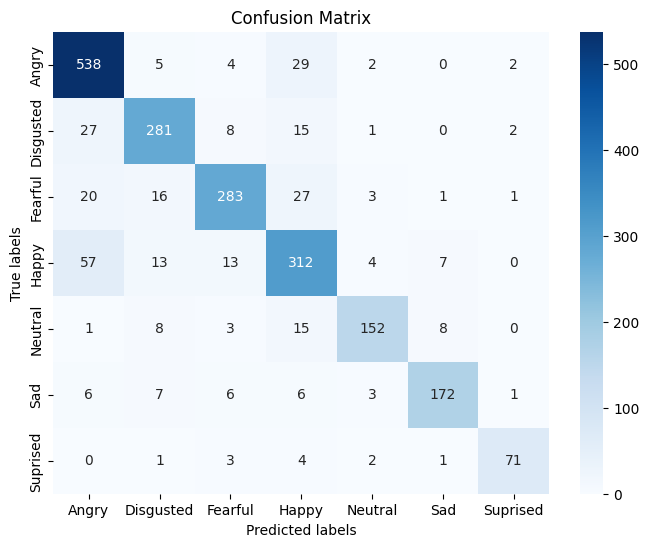

[[588   9   3  20   4   2   3]
 [ 15 271   5  20   4   0   2]
 [ 31   6 278  30   2   5   4]
 [ 66   7  13 288   4   5   2]
 [  6   4  11  18 141   7   2]
 [  1   9   3  10   5 176   3]
 [  0   2   2   0   0   4  50]]


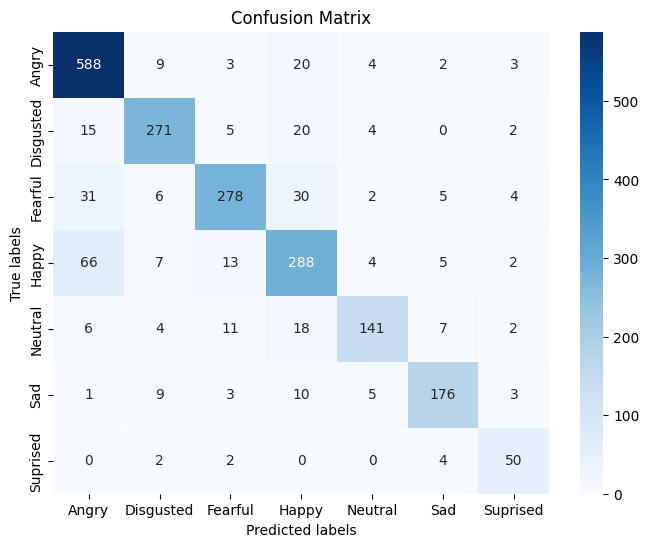

[[556   5   3  21   0   4   1]
 [ 29 236   6  14   5   3   0]
 [ 38  10 276  27   1   3   1]
 [ 50  13  21 330   9   4   7]
 [  2   8   1  15 123   3   1]
 [  5  14   6   5   8 213   0]
 [  1   2   0   0   1   0  60]]


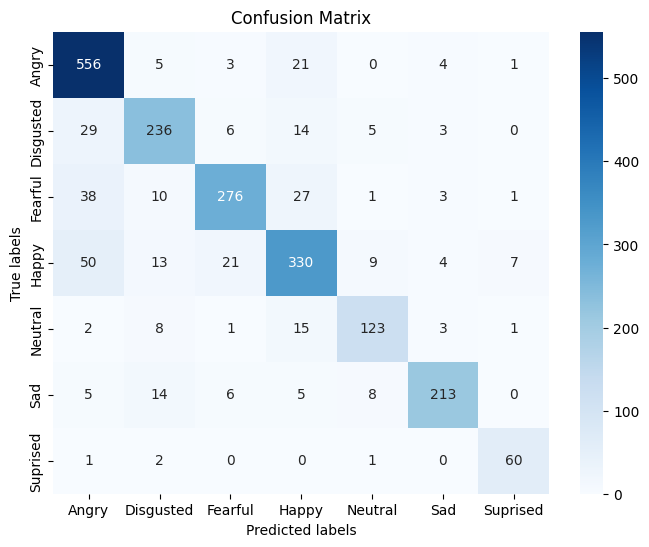

[[552   4   7  20   0   0   2]
 [ 48 231  13  20   2   5   4]
 [ 30  12 272  33   4   2   2]
 [ 45  11  10 320   3   1   1]
 [  6   5   5   7 148   3   0]
 [  1   5   6   4   3 207   2]
 [  0   4   4   1   1   6  68]]


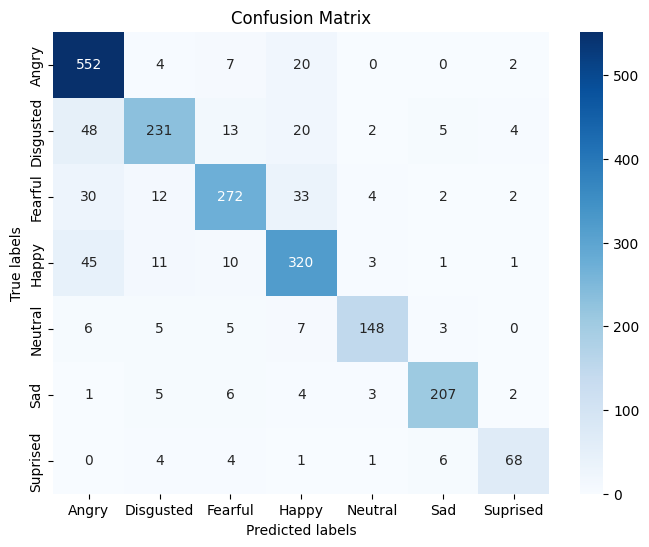

[[541   9   4  19   0   1   1]
 [ 35 262   4  15   0   0   0]
 [ 42  10 267  27   3   2   2]
 [ 45   6  19 352   3   0   4]
 [  3   7   8  13 142   4   0]
 [  5   7   3   4   2 192   1]
 [  1   5   1   2   1   4  62]]


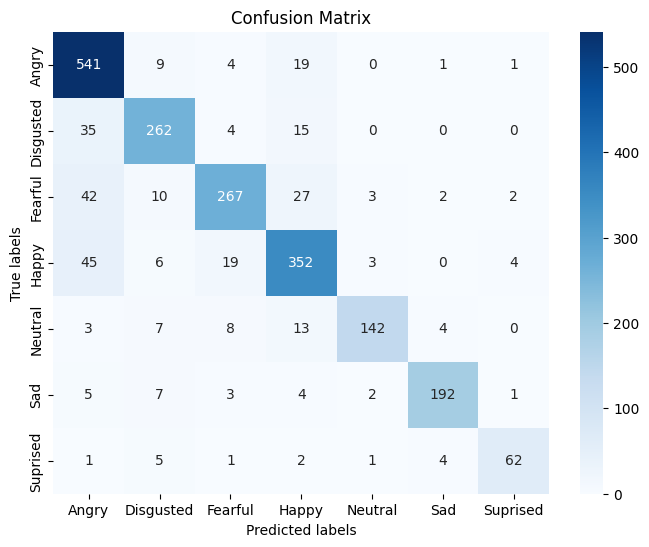

Label: Angry, Average Accuracy: 0.9378471134341814
Label: Disgusted, Average Accuracy: 0.8091903817432939
Label: Fearful, Average Accuracy: 0.7770037404648701
Label: Sad, Average Accuracy: 0.8719319030284274
Label: Happy, Average Accuracy: 0.7831641321627638
Label: Suprised, Average Accuracy: 0.8581471814523693
Label: Neutral, Average Accuracy: 0.8031244277814912
Model: RandomForestClassifier, Average Accuracy: 0.8419140326600811
[[545   5   7  21   0   0   2]
 [ 33 277   6  12   0   2   4]
 [ 23  15 284  25   1   0   3]
 [ 54   8  14 324   1   4   1]
 [  1   6   6  21 148   5   0]
 [  2   3   7   8   4 177   0]
 [  0   1   2   3   1   1  74]]


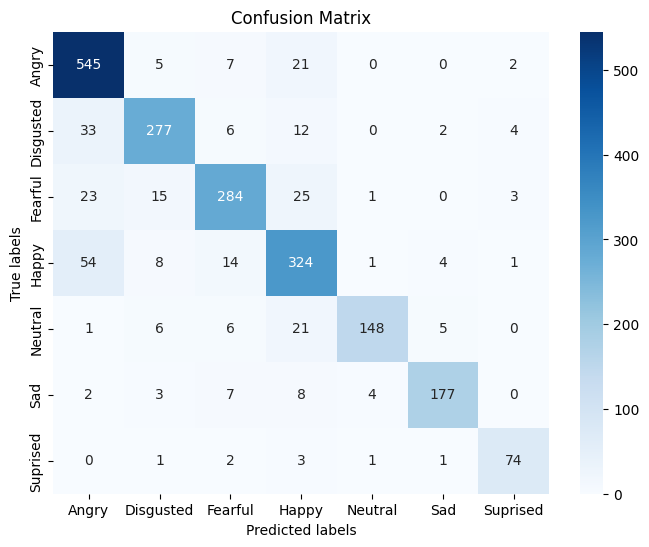

[[588   6   6  25   1   1   2]
 [ 17 269   5  20   3   1   2]
 [ 31   5 285  31   1   1   2]
 [ 67   8  14 287   2   4   3]
 [  6   2   7  22 147   3   2]
 [  1  11   5   9   3 177   1]
 [  1   4   0   0   0   4  49]]


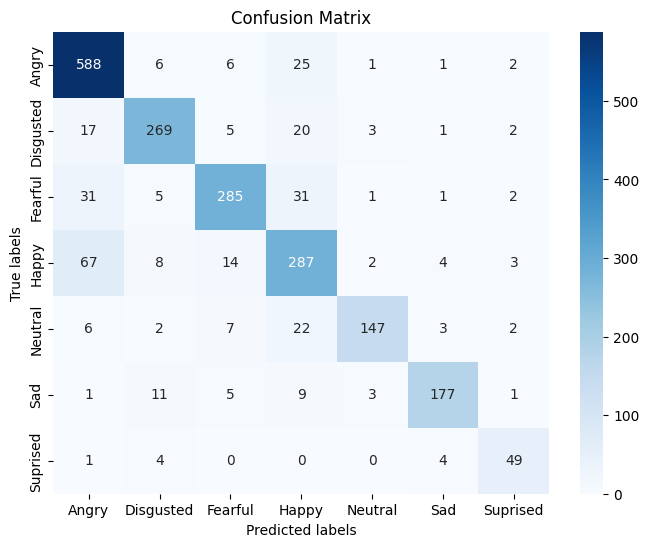

[[558   5   4  22   0   1   0]
 [ 27 243   4  14   3   1   1]
 [ 29   9 289  24   1   4   0]
 [ 49  15  17 336   6   6   5]
 [  3   6   2  14 124   3   1]
 [  2  16   7   2   5 219   0]
 [  0   3   1   0   1   0  59]]


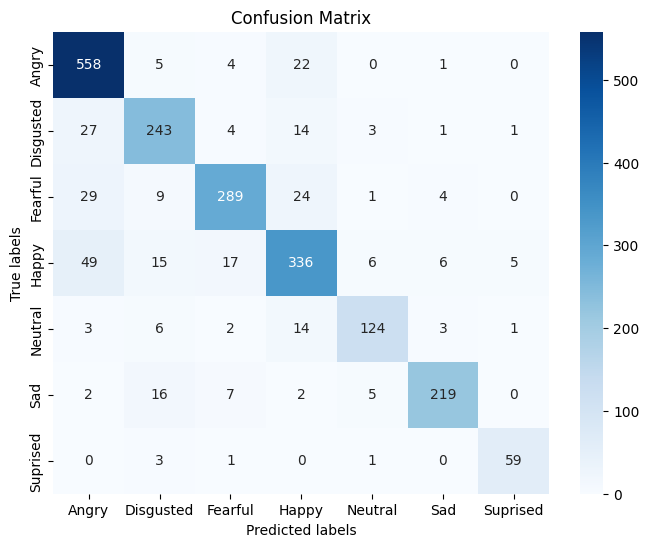

[[553   5   3  22   0   0   2]
 [ 47 229  15  24   2   3   3]
 [ 32   8 280  27   5   0   3]
 [ 40   9  10 329   1   0   2]
 [  5   6   3  13 144   3   0]
 [  1   4   6   3   6 208   0]
 [  0   2   5   1   0   5  71]]


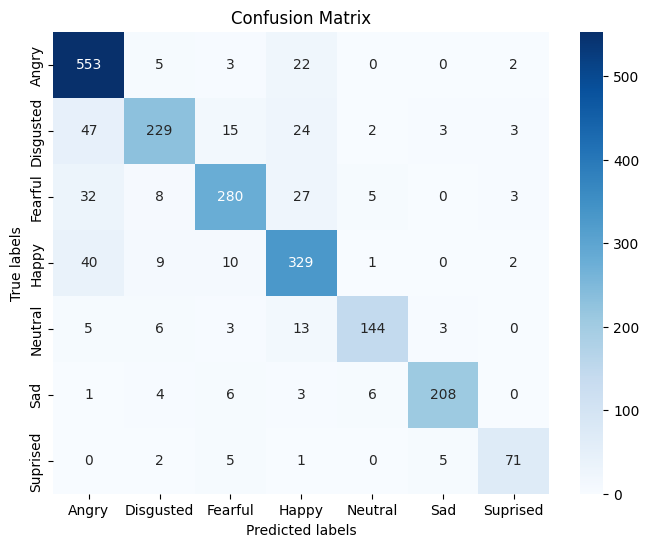

[[546   7   2  20   0   0   0]
 [ 29 261   3  22   0   1   0]
 [ 28  12 280  26   3   2   2]
 [ 51   4  15 353   2   1   3]
 [  7   8   5  13 141   3   0]
 [  4   8   4   6   0 192   0]
 [  0   8   0   0   0   2  66]]


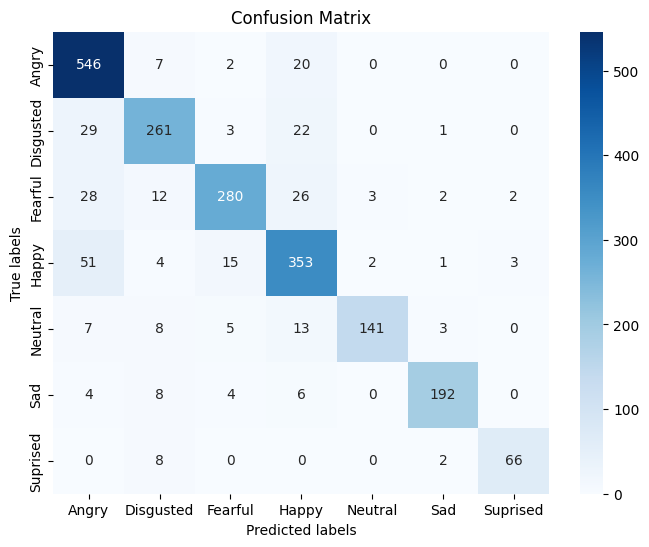

Label: Angry, Average Accuracy: 0.9404334984250845
Label: Disgusted, Average Accuracy: 0.8088152898820278
Label: Fearful, Average Accuracy: 0.788842858951363
Label: Sad, Average Accuracy: 0.8777315917431616
Label: Happy, Average Accuracy: 0.7897774359213469
Label: Suprised, Average Accuracy: 0.8673536665728662
Label: Neutral, Average Accuracy: 0.801949765968056
Model: ExtraTreesClassifier, Average Accuracy: 0.8513504912980657


In [86]:
find_model(train_test_data, [RandomForestClassifier, ExtraTreesClassifier])

In [87]:
X_train = train_test_data.drop(['label', 'file'], axis=1)
y_train = train_test_data['label']
X_val = validation_data.drop(['label', 'file'], axis=1)
y_val = validation_data['label']

In [88]:
# import pandas as pd
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# X_train = train_test_data.drop(['label', 'file'], axis=1)
# y_train = train_test_data['label']
# X_val = validation_data.drop(['label', 'file'], axis=1)
# y_val = validation_data['label']

# # Khởi tạo mô hình Random Forest Classifier
# clf = RandomForestClassifier()  

# # Huấn luyện mô hình
# clf.fit(X_train, y_train)

# # Dự đoán nhãn trên tập kiểm định
# y_pred_val = clf.predict(X_val)

# # In ra báo cáo phân loại
# print(classification_report(y_val, y_pred_val))

# # In ra ma trận nhầm lẫn
# print(confusion_matrix(y_val, y_pred_val))

# # In ra độ chính xác
# print("Accuracy:", accuracy_score(y_val, y_pred_val))

# # Tạo DataFrame chứa dòng val, tên file, label true và label predict
# results_df = pd.DataFrame({
#     "Val": validation_data.index,
#     "File": validation_data['file'],
#     "True Label": y_val,
#     "Predicted Label": y_pred_val
# })

# # Lưu DataFrame này vào file CSV
# results_df.to_csv("results.csv", index=False)
